# Analysis Challenge

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import (apriori, association_rules)
from mlxtend.preprocessing import TransactionEncoder
import ast

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

### EDA
#### Core Ratings Data

In [6]:
df = pd.read_csv('Grocery_and_Gourmet_Food.csv')

#Olivia's Path
#df = pd.read_csv('/content/drive/MyDrive/Quarter 2/Machine Learning/Analysis Group 2/Grocery_and_Gourmet_Food.csv')

In [7]:
df.head()

,user_id,parent_asin,rating,timestamp
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B004OT1TA8,5.0,1441260352000
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B01NAYX4S3,5.0,1523093131195
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B08KQLCRG7,5.0,1534441227514
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B0C5KQVWJL,5.0,1548207240942
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B09JP7Q6W8,5.0,1548207988441


In [8]:
df = df[df['timestamp']>=1546300800000]

In [9]:
df.describe()

,rating,timestamp
count,2.425957e+06,2.425957e+06
mean,4.253622e+00,1.616751e+12
std,1.299955e+00,3.722036e+10
min,1.000000e+00,1.546301e+12
25%,4.000000e+00,1.586717e+12
50%,5.000000e+00,1.616701e+12
75%,5.000000e+00,1.648391e+12
max,5.000000e+00,1.694054e+12


In [10]:
df.nunique()

user_id         347773
parent_asin     116492
rating               5
timestamp      2424985
dtype: int64

In [11]:
user_count = df.groupby('user_id').size()
ratings_distribution = user_count.value_counts().sort_index()

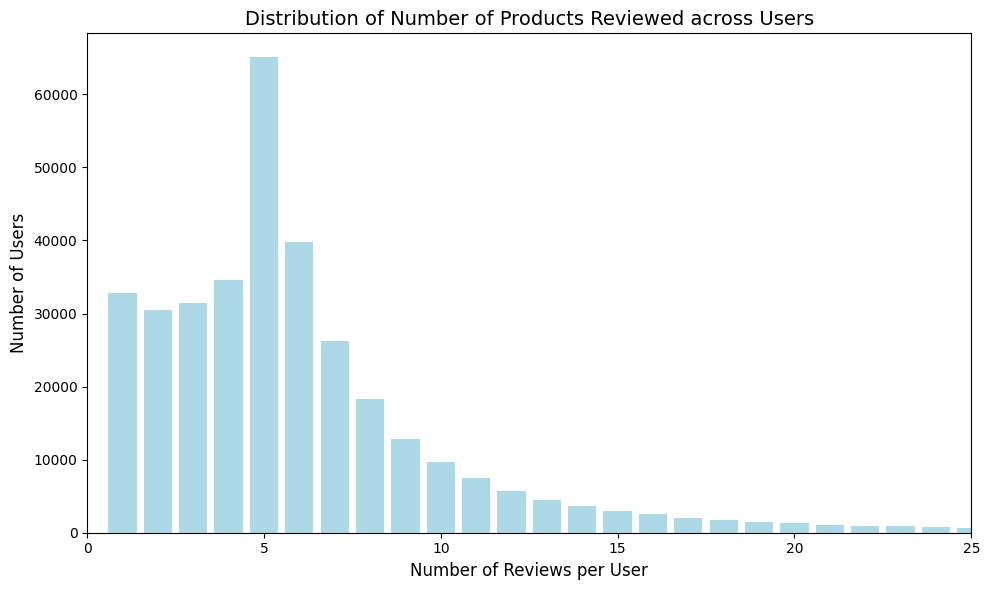

In [12]:
# Plotting the bar plot of the number of ratings by the number of users
plt.figure(figsize=(10, 6))
plt.bar(ratings_distribution.index, ratings_distribution, color='lightblue', width=0.8)

# Add labels and title
plt.title('Distribution of Number of Products Reviewed across Users', fontsize=14)
plt.xlabel('Number of Reviews per User', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xlim(0,25)
plt.xticks(rotation=0)

# Improve layout for better spacing
plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig('P1.png')

In [13]:
average_ratings = df.groupby('parent_asin')['rating'].mean()

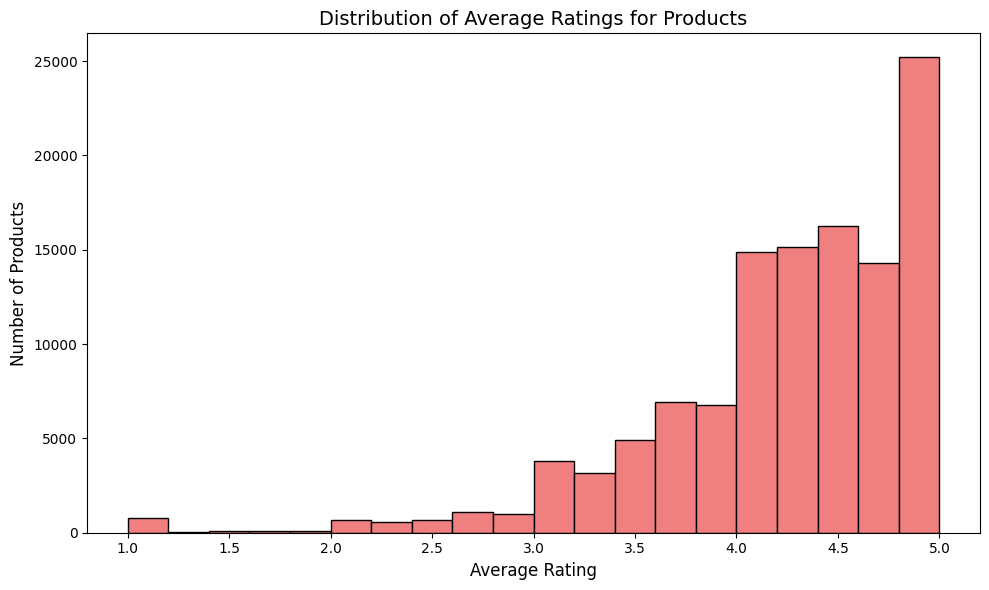

In [14]:
bins = [round(i * 0.2, 1) for i in range(5, 26)]

plt.figure(figsize=(10, 6))
plt.hist(average_ratings, bins=bins, edgecolor='black', color='lightcoral')

plt.title('Distribution of Average Ratings for Products', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig('P2.png')

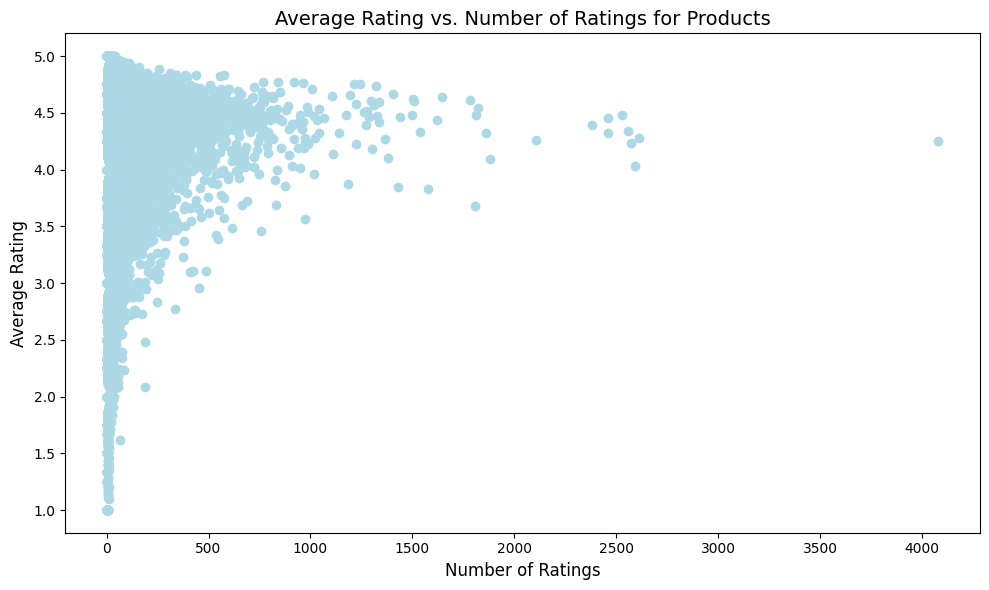

In [15]:
num_ratings = df.groupby('parent_asin')['rating'].count()
product_stats = pd.DataFrame({
    'average_rating': average_ratings,
    'num_ratings': num_ratings
})

# Step 4: Plot a scatter plot of average ratings vs. number of ratings
plt.figure(figsize=(10, 6))
plt.scatter(product_stats['num_ratings'], product_stats['average_rating'], color='lightblue')

# Step 5: Customize the plot
plt.title('Average Rating vs. Number of Ratings for Products', fontsize=14)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()

# Show the plot
# plt.show()
plt.savefig('P3.png')

#### Items Metadata

In [17]:
import json

#Olivia's path
#file = '/content/drive/MyDrive/Quarter 2/Machine Learning/Analysis Group 2/meta_Grocery_and_Gourmet_Food.jsonl'

file = 'meta_Grocery_and_Gourmet_Food.jsonl'
data = []
with open(file) as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [18]:
data = pd.DataFrame.from_dict(data)

In [19]:
data.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Grocery,Dark Roast Pure Coffee,4.7,9,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'YouCut_20220Cafe Du Monde Coffee C...,Luzianne,"[Grocery & Gourmet Food, Beverages, Coffee]","{'Brand': 'Luzianne', 'Item Form': 'Ground', '...",B00NE08WM6,None,NaN,NaN
1,Grocery,PICARAS Galletas Peruanas Bañadas en Chocolate...,4.5,12,[2 Bags of PICARAS Galletas Bañadas en Chocola...,[2 Bags of PICARAS Galletas Bañadas en Chocola...,15.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Winters,"[Grocery & Gourmet Food, Breads & Bakery, Cook...","{'Flavor': 'chocolate', 'Unit Count': '12.00 C...",B084Q13Q5Q,None,NaN,NaN
2,Grocery,Chipped Beef and Gravy By Patterson's - Great ...,3.2,5,[Six (6) 8-ounce cans of delicious chipped bee...,[Delicious corned beef gravy is ready when you...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pattersons,"[Grocery & Gourmet Food, Pantry Staples, Canne...",{'Package Dimensions': '8.4 x 5.8 x 3.4 inches...,B00KBRUYVM,None,NaN,NaN
3,Grocery,Asher's Sugar Free Milk Chocolate Cordial Cher...,5.0,6,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'No Sugar Added Chocolate Truffles'...,Generic,"[Grocery & Gourmet Food, Snacks & Sweets, Choc...","{'Brand': 'Generic', 'Item Form': 'Ball', 'Cho...",B0BN4PW255,None,NaN,NaN
4,Grocery,Messmer Peppermint 25 bags (6er pack),3.5,5,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Messmer,[],"{'Brand': 'Messmer', 'Item Form': 'Teabags', '...",B06X9DC27H,None,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603274 entries, 0 to 603273
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   main_category    595314 non-null  object 
 1   title            603274 non-null  object 
 2   average_rating   603274 non-null  float64
 3   rating_number    603274 non-null  int64  
 4   features         603274 non-null  object 
 5   description      603274 non-null  object 
 6   price            224319 non-null  object 
 7   images           603274 non-null  object 
 8   videos           603274 non-null  object 
 9   store            585994 non-null  object 
 10  categories       603274 non-null  object 
 11  details          603274 non-null  object 
 12  parent_asin      603274 non-null  object 
 13  bought_together  0 non-null       object 
 14  subtitle         20 non-null      object 
 15  author           17 non-null      object 
dtypes: float64(1), int64(1), object(14)
me

#### Data Preprocessing

In [22]:
# Join two datasets
df = pd.merge(df, data, on='parent_asin',how='inner')

In [23]:
df['date']=pd.to_datetime(df['timestamp'],unit='ms')

In [24]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [25]:
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x.strip()) if isinstance(x, str) else x)

In [26]:
# Extract the second layer of subcategory from the list
df['second_cat'] = df['categories'].apply(lambda x: x[1] if len(x) > 1 else None)
df['last_cat'] = df['categories'].apply(lambda x: x[-1] if len(x) > 0 else None)

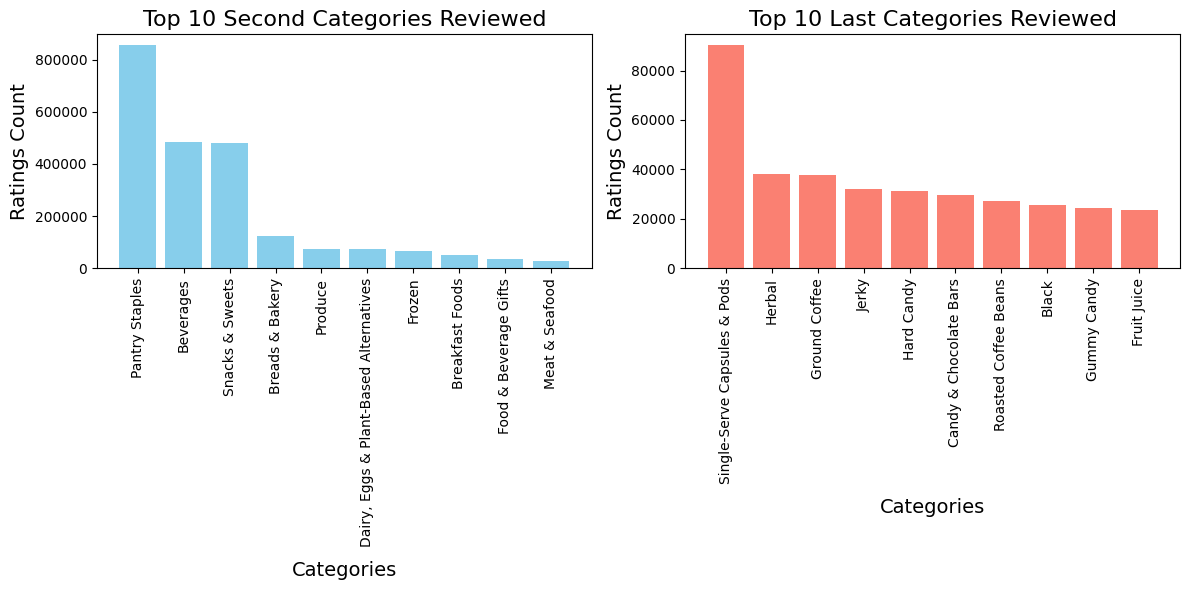

In [27]:
import matplotlib.pyplot as plt

# Get the top 10 categories by rating count
top10_second_cat = df.second_cat.value_counts().head(10)
top10_last_cat = df.last_cat.value_counts().head(10)

# Create the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot for the second category
axes[0].bar(top10_second_cat.index, top10_second_cat.values, color='skyblue')
axes[0].set_title('Top 10 Second Categories Reviewed', fontsize=16)
axes[0].set_xlabel("Categories", fontsize=14, labelpad=10)
axes[0].set_ylabel("Ratings Count", fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# Plot for the last category
axes[1].bar(top10_last_cat.index, top10_last_cat.values, color='salmon')
axes[1].set_title('Top 10 Last Categories Reviewed', fontsize=16)
axes[1].set_xlabel("Categories", fontsize=14, labelpad=10)
axes[1].set_ylabel("Ratings Count", fontsize=14)
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the side-by-side plots
plt.show()

### Association Rules

In [29]:
#Number of reviews of each user
nCustomerPurchase = df.groupby('user_id').size()

#Filter out users with > third quartile number of reviews
third_quartile = nCustomerPurchase.quantile(0.75)
first_quartile = nCustomerPurchase.quantile(0.25)
outlier_threshold = third_quartile+1.5*(third_quartile-first_quartile)

filtered_users = nCustomerPurchase[nCustomerPurchase <= nCustomerPurchase.quantile(0.995)].index

In [30]:
nCustomerPurchase.quantile(0.995)

56.0

In [31]:
# Keep only columns relevant for association rule for now
data = df[['user_id','parent_asin','year','month','day','second_cat','average_rating','rating_number']]

data.dropna(subset=['second_cat'], inplace=True)

data = data[data['user_id'].isin(filtered_users)]

/var/folders/kf/8ms7_h8j11bf86d6c5ykldrw0000gn/T/ipykernel_10111/2339853811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['second_cat'], inplace=True)


In [32]:
len(data)

2177008

In [33]:
# Create the basket data
ListItem = data.groupby(['user_id', 'year','month','day'])['second_cat'].apply(list)
ListItem= ListItem[ListItem.apply(lambda x: len(x) > 1)]
ListItem = ListItem.values.tolist()

In [34]:
len(ListItem)

314752

In [35]:
# Convert the Item List format to the Item Indicator format
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pd.DataFrame(te_ary, columns=te.columns_)
nCustomer, nProduct = ItemIndicator.shape
print(nCustomer, nProduct)

314752 165


In [36]:
results = pd.DataFrame(columns=['lowest_support', 'len_frequent_itemsets', 'len_assoc_rules'])

# Loop through the range of x values
for x in np.arange(500, 7000, 500):
    lowest_support = x / nCustomer  # Calculate lowest support
    frequent_itemsets = apriori(ItemIndicator, min_support=lowest_support, use_colnames=True, max_len=7)
    assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame([{
        'lowest_support': str(x) + '/nCustomer',
        'len_frequent_itemsets': len(frequent_itemsets),
        'len_assoc_rules': len(assoc_rules)
    }])], ignore_index=True)


# Display the final results
results

,lowest_support,len_frequent_itemsets,len_assoc_rules
0,500/nCustomer,332,233
1,1000/nCustomer,180,69
2,1500/nCustomer,123,42
3,2000/nCustomer,93,23
4,2500/nCustomer,78,20
5,3000/nCustomer,66,18
6,3500/nCustomer,55,13
7,4000/nCustomer,48,8
8,4500/nCustomer,44,6
9,5000/nCustomer,41,6


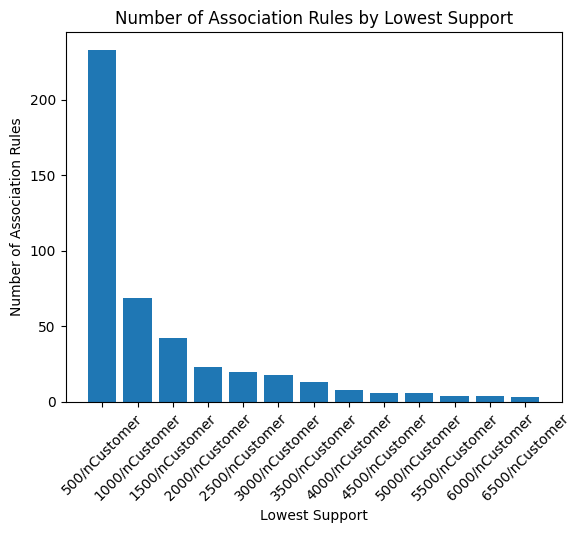

In [37]:
plt.bar(results['lowest_support'], results['len_assoc_rules'], label='Association Rules')
plt.xlabel('Lowest Support')
plt.xticks(rotation=45)
plt.ylabel('Number of Association Rules')
plt.title('Number of Association Rules by Lowest Support')
plt.show()

In [38]:
# Find the frequent itemsets
lowest_support = 1500/ nCustomer
frequent_itemsets = apriori(ItemIndicator, min_support = lowest_support, use_colnames = True, max_len=7)
frequent_itemsets.count()
frequent_itemsets['itemsets']

0                                            (Beverages)
1                                      (Breads & Bakery)
2                                     (Breakfast Cereal)
3                                      (Breakfast Foods)
4                                    (Candy & Chocolate)
                             ...                        
118    (Beverages, Dairy, Eggs & Plant-Based Alternat...
119    (Snacks & Sweets, Beverages, Pantry Staples, F...
120    (Pantry Staples, Beverages, Produce, Snacks & ...
121    (Breads & Bakery, Dairy, Eggs & Plant-Based Al...
122    (Snacks & Sweets, Dairy, Eggs & Plant-Based Al...
Name: itemsets, Length: 123, dtype: object

In [39]:
lowest_support

0.00476565677104514

In [40]:
# Discover the association rules
assoc_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
assoc_rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
33,"(Breakfast Foods, Beverages, Pantry Staples)",(Snacks & Sweets),0.010774,0.397799,0.006036,0.560307,1.408517,1.0,0.001751,1.369594,0.293192,0.014996,0.269856,0.287741
13,"(Breads & Bakery, Breakfast Foods)",(Snacks & Sweets),0.010824,0.397799,0.005906,0.545641,1.371651,1.0,0.001600,1.325387,0.273917,0.014666,0.245503,0.280244
31,"(Beverages, Breads & Bakery, Pantry Staples)",(Snacks & Sweets),0.018456,0.397799,0.010059,0.545016,1.370080,1.0,0.002717,1.323566,0.275195,0.024763,0.244466,0.285151
39,"(Dairy, Eggs & Plant-Based Alternatives, Bread...",(Snacks & Sweets),0.010405,0.397799,0.005407,0.519695,1.306426,1.0,0.001268,1.253788,0.237019,0.013425,0.202417,0.266644
41,"(Dairy, Eggs & Plant-Based Alternatives, Froze...",(Pantry Staples),0.007647,0.604269,0.005306,0.693810,1.148179,1.0,0.000685,1.292434,0.130051,0.008747,0.226266,0.351295
38,"(Beverages, Produce, Snacks & Sweets)",(Pantry Staples),0.007863,0.604269,0.005442,0.692121,1.145385,1.0,0.000691,1.285345,0.127937,0.008971,0.221999,0.350564
40,"(Dairy, Eggs & Plant-Based Alternatives, Bread...",(Pantry Staples),0.007828,0.604269,0.005407,0.690747,1.143111,1.0,0.000677,1.279633,0.126182,0.008913,0.218526,0.349848
36,"(Dairy, Eggs & Plant-Based Alternatives, Bever...",(Pantry Staples),0.010964,0.604269,0.007466,0.680962,1.126918,1.0,0.000841,1.240387,0.113872,0.012285,0.193800,0.346659
35,"(Dairy, Eggs & Plant-Based Alternatives, Bever...",(Pantry Staples),0.007276,0.604269,0.004925,0.676856,1.120123,1.0,0.000528,1.224626,0.108027,0.008118,0.183424,0.342503
37,"(Beverages, Frozen, Snacks & Sweets)",(Pantry Staples),0.007736,0.604269,0.005109,0.660370,1.092840,1.0,0.000434,1.165180,0.085615,0.008418,0.141764,0.334412


In [41]:
assoc_rules[['support','consequent support','confidence','lift']].describe()

,support,consequent support,confidence,lift
count,42.000000,42.000000,42.000000,42.000000
mean,0.010904,0.584606,0.568148,0.984615
std,0.009608,0.061343,0.054758,0.153717
min,0.004791,0.397799,0.505657,0.836808
25%,0.005515,0.604269,0.534730,0.887633
50%,0.007423,0.604269,0.548499,0.912239
75%,0.011970,0.604269,0.575695,1.064415
max,0.049664,0.604269,0.693810,1.408517


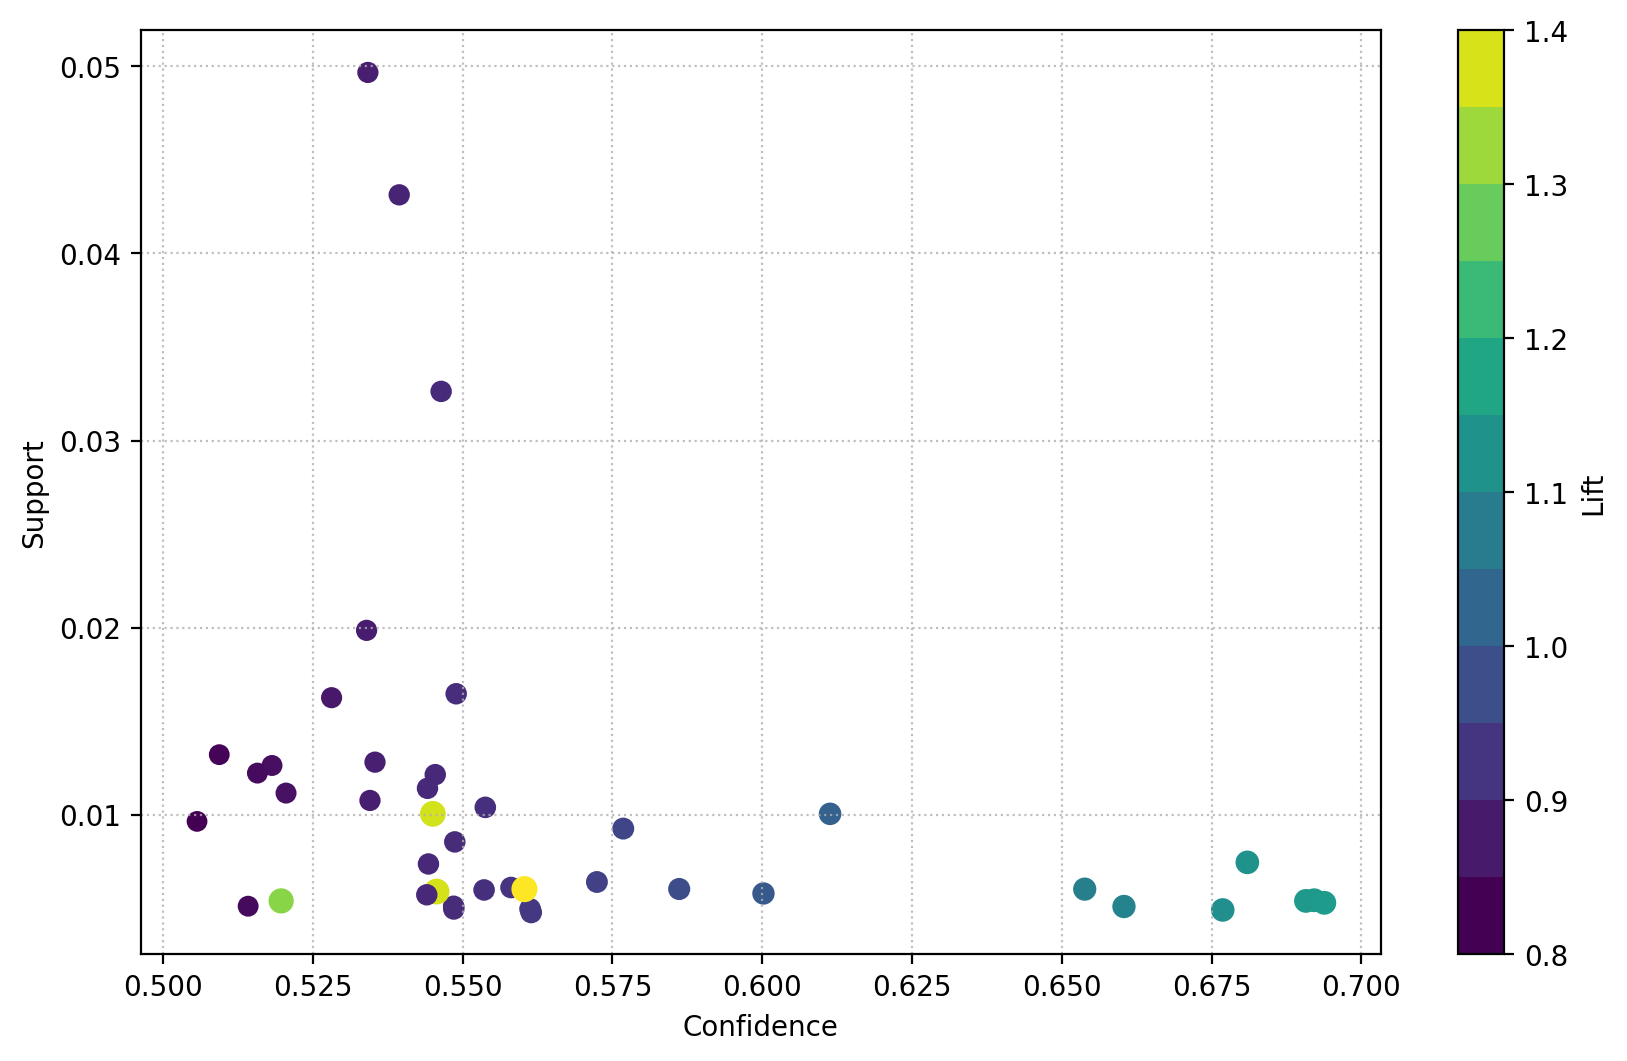

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (10,6), dpi = 200)
cs = ax.scatter(assoc_rules['confidence'], assoc_rules['support'], marker = 'o',
                c = assoc_rules['lift'], s = 50*assoc_rules['lift'])
ax.set_xlabel('Confidence')
ax.set_ylabel('Support')
ax.grid(axis = 'both', linestyle = ':', alpha = 0.8)
fig.colorbar(cs, label = 'Lift', boundaries = np.arange(0.8, 1.45, 0.05))

# Filter based on rating

In [44]:
consequents_list= [list(frozenset_item) for frozenset_item in assoc_rules['consequents']]
consequents_list= [item for sublist in consequents_list for item in sublist]
consequents_list

antecedents_list= [list(frozenset_item) for frozenset_item in assoc_rules['antecedents']]
antecedents_list= [item for sublist in antecedents_list for item in sublist]
antecedents_list

['Breakfast Foods',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Grocery Prime Day 2017',
 'Meat & Seafood',
 'Produce',
 'SNAP EBT on Amazon',
 'Beverages',
 'Breakfast Foods',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Beverages',
 'Deli & Prepared Foods',
 'Beverages',
 'Beverages',
 'Frozen',
 'Beverages',
 'Meat & Seafood',
 'Beverages',
 'Produce',
 'Breads & Bakery',
 'Breakfast Foods',
 'Breads & Bakery',
 'Breakfast Foods',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Breads & Bakery',
 'Breads & Bakery',
 'Frozen',
 'Breads & Bakery',
 'Produce',
 'Breakfast Foods',
 'Snacks & Sweets',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Deli & Prepared Foods',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Frozen',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Meat & Seafood',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Produce',
 'Dairy, Eggs & Plant-Based Alternatives',
 'Snacks & Sweets',
 'Deli & Prepared Foods',
 'Frozen',
 'Deli & Prepared Foods',
 'Snacks & Sweets',
 'Meat & 

In [45]:
len(consequents_list)

42

In [46]:
filtered_df=df[df['second_cat'].isin(consequents_list)]
filtered_df.shape

(1335556, 25)

In [47]:
import numpy as np

agg_filtered = filtered_df.groupby(['title','second_cat']).agg({'rating_number': 'mean', 'average_rating': 'mean'}).reset_index()

max_rating = agg_filtered['average_rating'].max()
max_reviews = agg_filtered['rating_number'].max()

def calculate_weighted_score(row, rating_weight, review_weight, max_rating, max_reviews):
    return (row['average_rating'] / max_rating * rating_weight) + (row['rating_number'] / max_reviews * review_weight)

agg_filtered['scoring'] = agg_filtered.apply(calculate_weighted_score, axis=1,
                                             rating_weight=0.3, review_weight=0.7,
                                             max_rating=max_rating, max_reviews=max_reviews)

agg_filtered = agg_filtered.sort_values(by=['second_cat','scoring'], ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
agg_filtered

,title,second_cat,rating_number,average_rating,scoring
0,"Goldfish Cheddar Crackers, Snack Crackers, 30 ...",Snacks & Sweets,125106.000000,4.800,0.969570
1,"Welch's Mixed Fruit, 0.9 oz, 40 Ct",Snacks & Sweets,97758.000000,4.800,0.820579
2,Frito-Lay Chips and Quaker Chewy Granola Bars ...,Snacks & Sweets,97009.000000,4.600,0.804499
3,"Quaker Chewy Granola Bars, Oatmeal Raisin, 58 ...",Snacks & Sweets,87155.000000,4.700,0.756815
4,"Orville Redenbacher's Gourmet Popcorn Kernels,...",Snacks & Sweets,82342.000000,4.700,0.730594
...,...,...,...,...,...
64703,"Starkist Solid White Albacore Tuna in Water, 3...",Pantry Staples,20.000000,2.300,0.138109
64704,"Walden Farms Whipped Peanut Spread, Fat and Ca...",Pantry Staples,1817.833333,1.825,0.119403
64705,"Celeste Frozen Pizza for One, Original Cheese,...",Pantry Staples,53.000000,1.900,0.114289
64706,"Walden Farms Whipped Chocolate Peanut Spread, ...",Pantry Staples,265.000000,1.700,0.103444


In [105]:
agg_filtered.query("second_cat=='Snacks & Sweets'").head(10)

,title,second_cat,rating_number,average_rating,scoring
0,"Goldfish Cheddar Crackers, Snack Crackers, 30 ...",Snacks & Sweets,125106.0,4.8,0.969570
1,"Welch's Mixed Fruit, 0.9 oz, 40 Ct",Snacks & Sweets,97758.0,4.8,0.820579
2,Frito-Lay Chips and Quaker Chewy Granola Bars ...,Snacks & Sweets,97009.0,4.6,0.804499
3,"Quaker Chewy Granola Bars, Oatmeal Raisin, 58 ...",Snacks & Sweets,87155.0,4.7,0.756815
4,"Orville Redenbacher's Gourmet Popcorn Kernels,...",Snacks & Sweets,82342.0,4.7,0.730594
5,Ring Pop Bulk Candy Lollipop Variety Party Pac...,Snacks & Sweets,70121.0,4.8,0.670015
6,"Pringles Potato Crisps Chips, Snack Stacks, Lu...",Snacks & Sweets,61809.0,4.7,0.618732
7,"Cheez-It Cheese Crackers, Baked Snack Crackers...",Snacks & Sweets,59702.0,4.8,0.613253
8,Ferrero Collection Premium Gourmet Assorted Ha...,Snacks & Sweets,54645.0,4.8,0.585703
9,"Mott's Fruit Flavored Snacks, Assorted Fruit, ...",Snacks & Sweets,54499.0,4.7,0.578907


In [49]:
agg_filtered.query("second_cat=='Pantry Staples'").head(10)

,title,second_cat,rating_number,average_rating,scoring
21819,[Samyang] Carbo Spicy Chicken Fried Cup Noodle...,Pantry Staples,128489.0,4.4,0.964000
21820,Lakanto Golden Monk Fruit Sweetener with Eryth...,Pantry Staples,112773.0,4.7,0.896380
21821,Organic Coconut Oil - Unrefined and Cold-Press...,Pantry Staples,96857.0,4.7,0.809671
21822,"Maruchan Ramen Creamy Chicken Flavor, 3 Oz, Pa...",Pantry Staples,74087.0,4.7,0.685621
21823,Samyang Buldak Carbo Korean Spicy Hot Chicken ...,Pantry Staples,74849.0,4.5,0.677773
21824,"Wonderful Pistachios, Roasted and Salted, 8 Ou...",Pantry Staples,64589.0,4.7,0.633877
21825,Mike’s Hot Honey–Original & Extra Hot Combo 10...,Pantry Staples,55269.0,4.7,0.583102
21826,Maggi Masala 2-Minute Noodles India Snack - 24...,Pantry Staples,59627.0,4.3,0.582844
21827,"Maruchan Instant Lunch Lime Chicken Flavor, 2....",Pantry Staples,54937.0,4.6,0.575293
21828,"Heinz, Tomato Ketchup, 14oz Squeeze Bottle (Pa...",Pantry Staples,50263.0,4.8,0.561830
